In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import re

df = pd.read_csv('archives.csv')

for i in range(0, df.shape[0], 2):
    df = df.drop(i)


df = df[df['Text'].apply(lambda x: x != '[]')]

df['Date'] = pd.to_datetime(df['Date'])

df = df.sort_values(by='Date')


def remove_all_words_with_nt(text):
    return ' '.join(re.sub(r'\b\w*([nxtNXT1234567890])\w*\b', '', word) for word in text.split())


def remove_stop_symbols(text):
    text_to_remove = remove_all_words_with_nt(text)
    return ''.join(char for char in text_to_remove if char not in set(string.punctuation))

df['tokenized_text'] = df['Text'].apply(lambda x: remove_stop_symbols(x.lower()).split())

all_words = [word for tokens in df['tokenized_text'] for word in tokens]


word_frequency = pd.Series(all_words).value_counts().reset_index()
word_frequency.columns = ['word', 'frequency']

df = df.drop('tokenized_text', axis=1)


with open('stopwords_ua.txt', 'r', encoding='utf-8') as file:
    stopwords_ua = file.read().splitlines()

word_frequency = word_frequency[~word_frequency['word'].isin(stopwords_ua)]
word_frequency = word_frequency.reset_index()
word_frequency = word_frequency.drop('index', axis=1)

word_frequency.head(10)

,word,frequency
0,—,54
1,липня,52
2,новини,50
3,comua,50
4,україни,48
5,поліції,21
6,області,18
7,вул,17
8,повідомляє,15
9,год,14


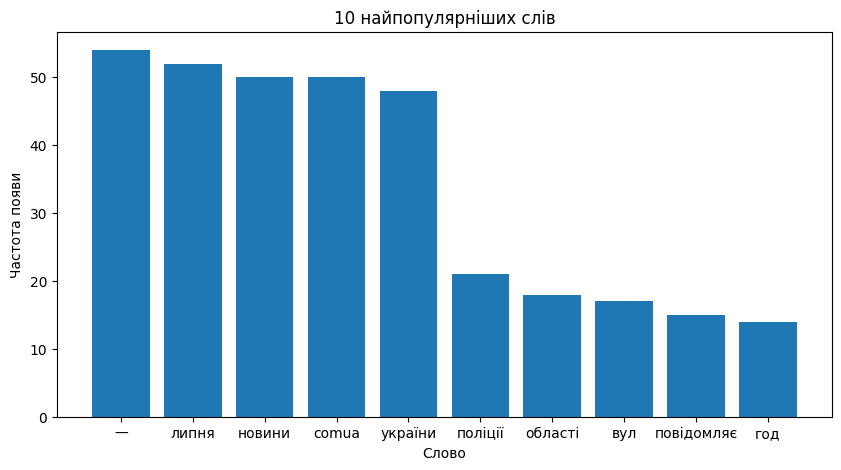

In [83]:
word_frequency.to_csv('word_frequency.csv', index=True)
df.to_csv('archives_clear.csv', index=False)

plt.figure(figsize=(10, 5))
plt.bar(word_frequency['word'][:10], word_frequency['frequency'][:10])
plt.title('10 найпопулярніших слів')
plt.xlabel('Слово')
plt.ylabel('Частота появи')
plt.show()